In [159]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, random_split

from models.resnet import ResNetVAE
from models.autoencoders import AE, VAE
from trainers.autoencoders import train_ae, train_vae
from utils_.plotting import plot_image_grid
from dataloaders.basic import images_to_np_array_from_im_paths

In [184]:
torch.cuda.empty_cache()

DATA_PATH = "./datasets/sim_recs"
IMAGE_RESIZE = 32
LATENT_DIM = 32
image_count = 200
batch_size = 16

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device Name: {torch.cuda.get_device_name(device)}" if device.type == "cuda" else "Using cpu")

Device Name: NVIDIA GeForce RTX 3090


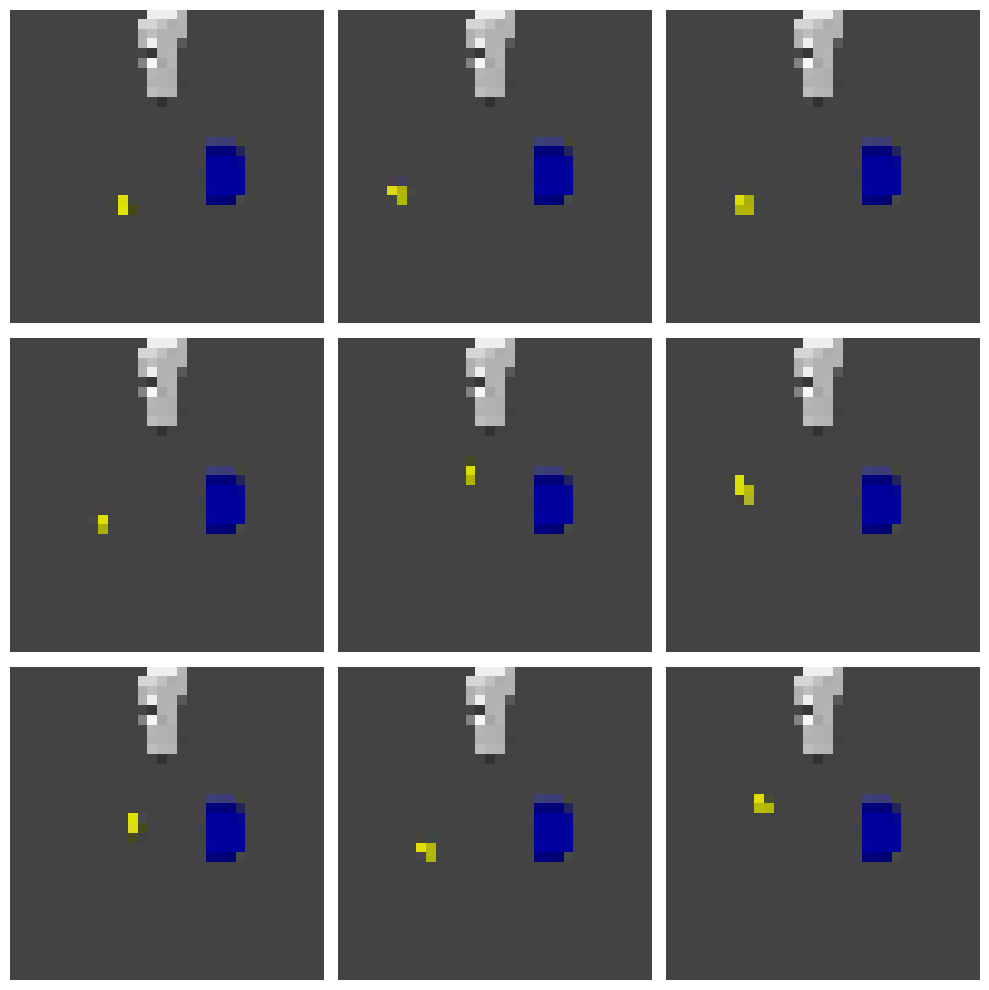

In [185]:
dirs = os.listdir(DATA_PATH)
im_paths = [f"{DATA_PATH}/{dirs[i]}/images/0000.jpg" for i in range(image_count)]
images = images_to_np_array_from_im_paths(im_paths, image_dim=IMAGE_RESIZE)
num_images = images.shape[0]
rand_indices = np.random.choice(num_images, size=9, replace=False)
rand_images = [np.transpose(images[i], (1, 2, 0)) for i in rand_indices]
plot_image_grid(rand_images)

In [186]:
dataset = TensorDataset(torch.Tensor(images))

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [187]:
model = ResNetVAE(latent_dim=LATENT_DIM, in_channels=3).to(device)
# model = VAE(latent_dim=LATENT_DIM, input_dim=IMAGE_RESIZE, dropout_prob=.0).to(device)
model = train_vae(model, device, train_loader, val_loader, n_epochs=700, lr=1e-3, checkpoint_every=500, beta=0.01)

Epoch 1,	 Train Loss: 1365.126086,	 Val Loss: 1321.851074
Epoch 2,	 Train Loss: 399.605576,	 Val Loss: 737.349274
Epoch 3,	 Train Loss: 274.229559,	 Val Loss: 593.370697
Epoch 4,	 Train Loss: 201.325644,	 Val Loss: 391.242325
Epoch 5,	 Train Loss: 150.838969,	 Val Loss: 287.909119
Epoch 6,	 Train Loss: 116.394488,	 Val Loss: 104.482237
Epoch 7,	 Train Loss: 89.165839,	 Val Loss: 82.014132
Epoch 8,	 Train Loss: 73.286743,	 Val Loss: 53.330184
Epoch 9,	 Train Loss: 61.733883,	 Val Loss: 46.010801
Epoch 10,	 Train Loss: 53.877291,	 Val Loss: 41.613885
Epoch 11,	 Train Loss: 52.514862,	 Val Loss: 37.715805
Epoch 12,	 Train Loss: 48.628480,	 Val Loss: 37.744703
Epoch 13,	 Train Loss: 45.388824,	 Val Loss: 34.270816
Epoch 14,	 Train Loss: 42.327972,	 Val Loss: 38.615874
Epoch 15,	 Train Loss: 42.913227,	 Val Loss: 32.762901
Epoch 16,	 Train Loss: 44.185432,	 Val Loss: 33.076822
Epoch 17,	 Train Loss: 40.934707,	 Val Loss: 34.292478
Epoch 18,	 Train Loss: 38.433546,	 Val Loss: 30.235855
Epoch

KeyboardInterrupt: 

AttributeError: 'ResNetVAE' object has no attribute 'path'

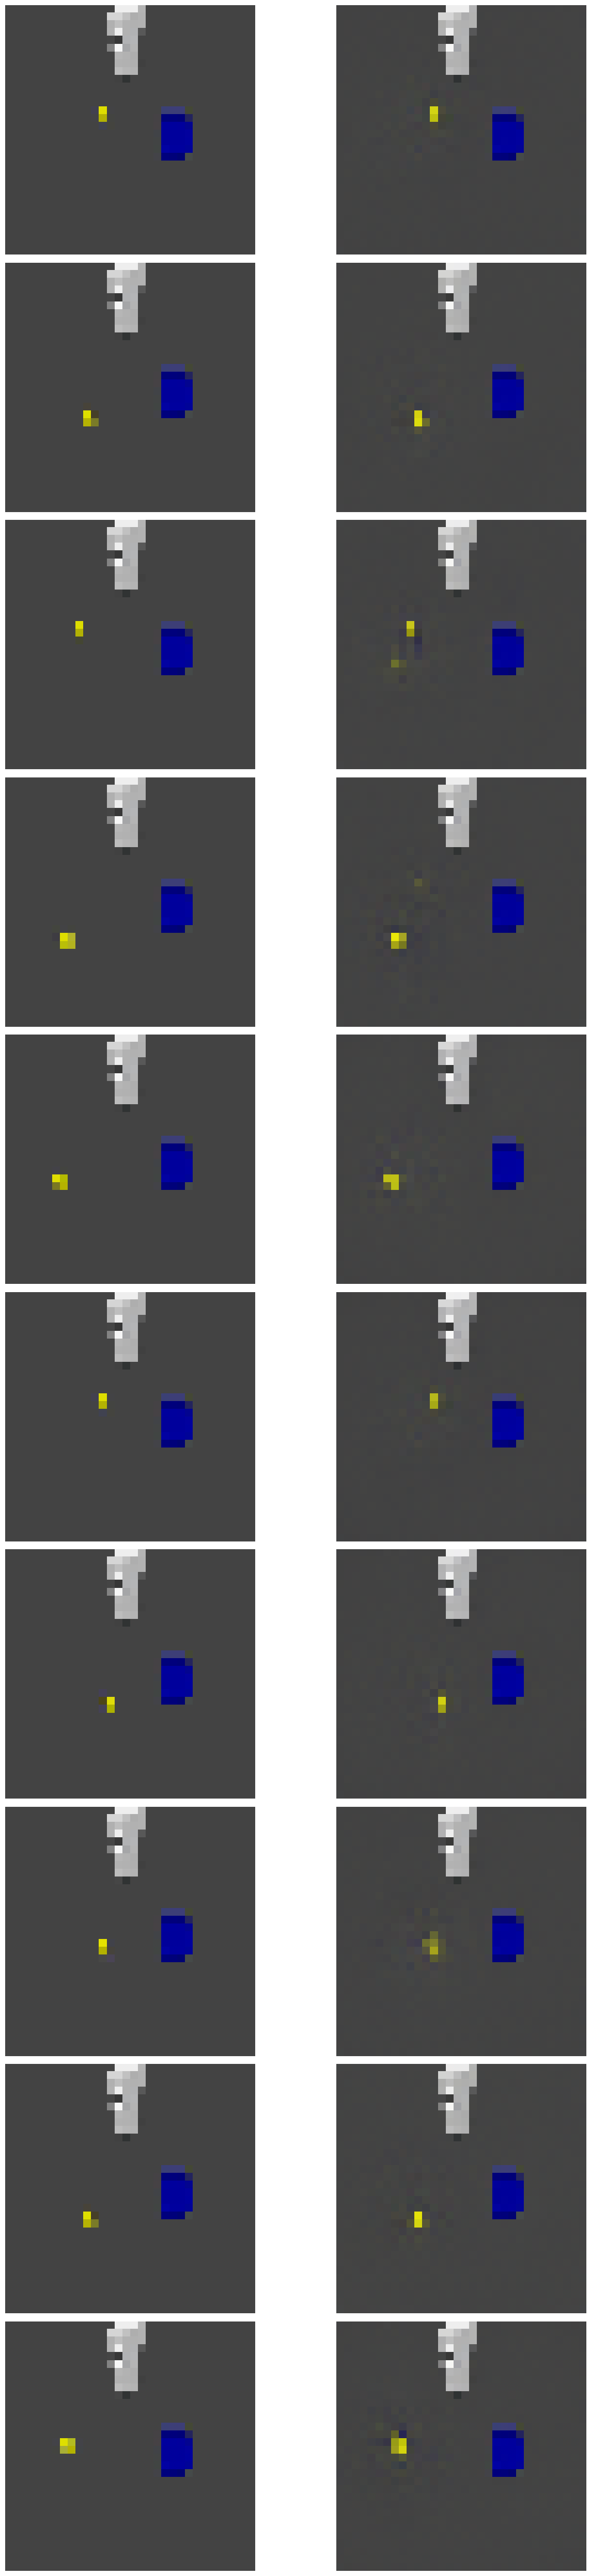

In [ ]:
example_count = 10
rand_images = np.array([val_dataset[np.random.randint(0, len(val_dataset))][0] for _ in range(example_count)])
pred_images = model.forward_clean(torch.Tensor(rand_images).to(device))

fig, axes = plt.subplots(example_count, 2, figsize=(15, 50))

for i in range(example_count):
    image = np.transpose(rand_images[i], (1, 2, 0))
    axes[i, 0].imshow(image)
    axes[i, 1].imshow(pred_images[i])

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')

plt.tight_layout()
model_path = model.path
plt.savefig(f"{model_path}/results.png")
plt.show()